In [1]:
import os, sys
dir = os.path.abspath('../ssp')
dir = os.path.dirname(dir)
sys.path.append(dir)

import numpy as np
import matplotlib.pyplot as plt

from ssp import spectrum

Let's start with a single complex exponentional mixed in white noise:

$$

x(n) = \sum_{i = 1}^{p} A_i e^{j n \omega_i} + w(n)

$$

We assume the amplitude is itself complex with a positive amplitude and a positive frequency between $ (0, \phi) $.
$$

A_i = \vert A_i \vert e^{j \phi_i} 

$$
Assuming the process runs for the rest of time, its autocorrelation sequence of such a process is:

$$

r_x(k) = \sum_{i = 1}^{p} \vert A_i \vert ^2 e^{j k \omega_i} + \sigma_w^2 \delta(k)

$$

Note that A_i is known from the complex exponential representation and $ \sigma_w^2 $ is assumed given. Hence, there are two different additive processes are at work here, one described as a sum of positive exponentials relating to the signal of interest, and a processes which is just a constant for all time. Hence, the unknown random process model is a noisy signal expressed as a some of known and real exponentials plus a constant.

$$
R_x = R_s + R_n
$$

The noise matrix is a diagonal matrix.

$$
R_n = \sigma_w^2 I
$$

$$
R_s = \vert A_1 \vert ^2

\begin{pmatrix}
   1                      & e^{-j \omega_1}      & e^{-j 2 \omega_1} & ... & e^{-j (M - 1) \omega_1} \\
   e^{j \omega_1}       & 1                      & e^{j \omega_1}    & ... & e^{-j (M - 2) \omega_1} \\
   e^{j 2 \omega_1}       & e^{j \omega_1}       & 1                 & ... & e^{-j (M - 3) \omega_1} \\
   \vdots & \vdots & \vdots &  \vdots & \vdots \\
   e^{j (M - 1) \omega_1} & e^{j (M - 2) \omega_1} & e^{-j (M - 3) \omega_1} & ... & 1 \\
\end{pmatrix}

$$

$$
R_x = \sum_{i = 1}^{p} \vert A_i \vert ^2 e_i e_i^H + \sigma_w^2 I
$$

Let $ e_i $ be a column vector:

$$
e_i = [1, e^{j \omega_i}, e^{j 2 \omega_i}, ..., e^{j (M-1) \omega_i}] ^T
$$

If we layout a new matrix with $ p $ many $ e_i $ column vectors the result is a $ M $ x $ p $ matrix which we represent as:

$$
E = [e_1, e_2, ..., e_p]
$$

This is a rank p matrix which spans a p-dimensional euclidian space, fully defined by the orthogonal basis vectors $ e_i $.

## Principle Components

The complete spectral representation of a real-valued continuous-state discrete-time bandlimited processe in white noise is an exact 2nd order (moment) statistical representation of of the noisy signal.

At the heart of this connection, sits the infamous Spectral Theorem:

$$
R_x = V_{ss} V_s^H + V_{nn} V_n^H
$$

$$
V_s = [\text v_1, \text v_2, ..., \text v_p]^T
$$

$$
V_n = [\text v_{p+1}, \text v_{p+2}, \text ..., \text v_M]^T
$$

$$
R_x = \sum_{i = 1}^{p}(\lambda_i^s + \sigma_w^2) \text v_i \text v_i^H + \sum_{i=p+1}^M \sigma_w^2 \text v_i \text v_i^H
$$

The orthogonality of the signal and error subspaces allows us to differentiate the components.

$$
e_i^H v_k = 0
$$
$$
i=1, 2, ..., p
$$
$$
k=p + 1, p + 2, ..., M
$$

Hence, at the exact signal frequencies, the following function blows up to infinity and may be used for frequency estimation:

$$
\hat{P}(e^{j\omega}) = \frac{1}{\displaystyle\sum_{i=p+1}^{M} \alpha_i \vert e^H v_i \vert ^2}
$$

# Example of four sinusoids

$ \omega_k $ are $ 0.2\pi, 0.3\pi, 0.8\pi, 1.2\pi $ and the variance of white noise variance is $ \sigma_w^2 = 0.5 $. Number of samples is $ M = 64 $

$$
x(n) = \sum_{k = 1}^{4} e^{j(n \omega_k + \phi_k)} + w(n)
$$

In [2]:
R = 10
N = 64
nvar = 0.5
wk = [0.2, 0.3, 0.8, 1.2]

rng1 = np.random.default_rng()
signoise = rng1.normal(0, np.sqrt(nvar), (R, N))

rng2 = np.random.default_rng()
phasek = rng2.uniform(0, 2 * np.pi, (R, N))

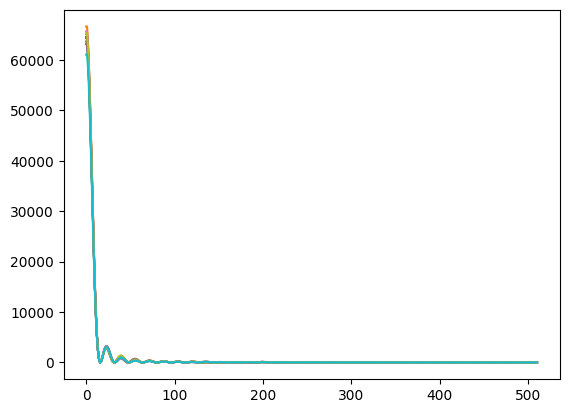

In [21]:
Rx = spectrum.overlay(64, wk, [1, 1, 1, 1], nvar, 10, alg="periodogram")
plt.plot(np.abs(Rx[0:511, :10]))
#plt.plot(20 * np.log10(np.abs(Rx[0:511, :10])))
print()

## Simulation

For the Pisarenko method, a 5x5 autocorrelation matrix is estimated from the ten simulated 64-sample realizations.

The other methods all use the samples as the 64x64 sampled matrix over 10 realizations.